In [3]:
pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/4b/e4/f9e96896278308e17dfd4f60a84826c48117674c980234ee38f59ab28a12/statsmodels-0.14.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/87/2b/b50d3d08ea0fc419c183a84210571eba005328efa62b6b98bc28e9ead32a/patsy-1.0.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB 8.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/9.9 MB 8.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.9 MB 10.3 MB/s eta 0:00:01
   ------- -------------------------------- 1.7/9.9 MB 10.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.9 MB 11.2 MB/s eta 0:00:01
   ----------- ---------------------------- 2.9/9.9 MB 11.0 MB/s eta 0:00:01
   -------------- ------------------------- 3.5/


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.Collecting openpyxl
  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/c1/8b/5fe2cc11fee489817272089c4203e679c63b570a5aaeb18d852ae3cbba6a/et_xmlfile-2.0.0-py3-none-any.whl.metadata
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)




[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import openpyxl

In [5]:
main_df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding="ISO-8859-1")

In [10]:
risk_map_df = pd.read_excel("data_dictionary.xlsx")

In [12]:
risk_map_df.rename(columns=lambda x: x.strip(), inplace=True)
risk_map_df.rename(columns={"Field Name": "Field"}, inplace=True)

main_df.columns = [col.strip() for col in main_df.columns]
risk_map_df['Field'] = risk_map_df['Field'].str.strip()

In [13]:
numeric_cols = main_df.select_dtypes(include=['int64', 'float64']).columns
mapped_numeric = risk_map_df[risk_map_df['Field'].isin(numeric_cols)]


=== Days for shipping (real) (Lead Time) ===
count    180519.000000
mean          3.497654
std           1.623722
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Days for shipping (real), dtype: float64


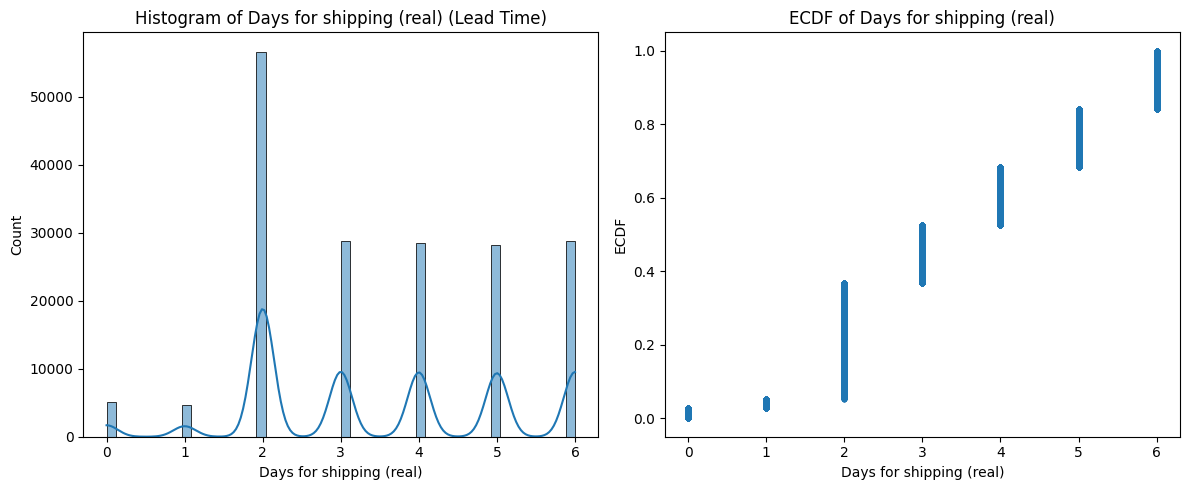


=== Days for shipment (scheduled) (Lead Time) ===
count    180519.000000
mean          2.931847
std           1.374449
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: Days for shipment (scheduled), dtype: float64


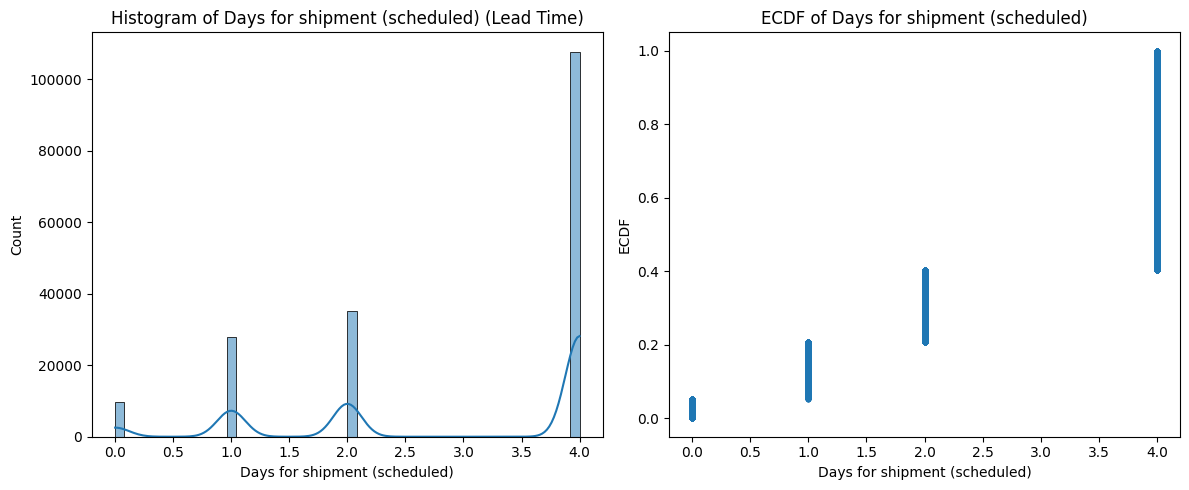


=== Benefit per order (Other) ===
count    180519.000000
mean         21.974989
std         104.433526
min       -4274.979980
25%           7.000000
50%          31.520000
75%          64.800003
max         911.799988
Name: Benefit per order, dtype: float64


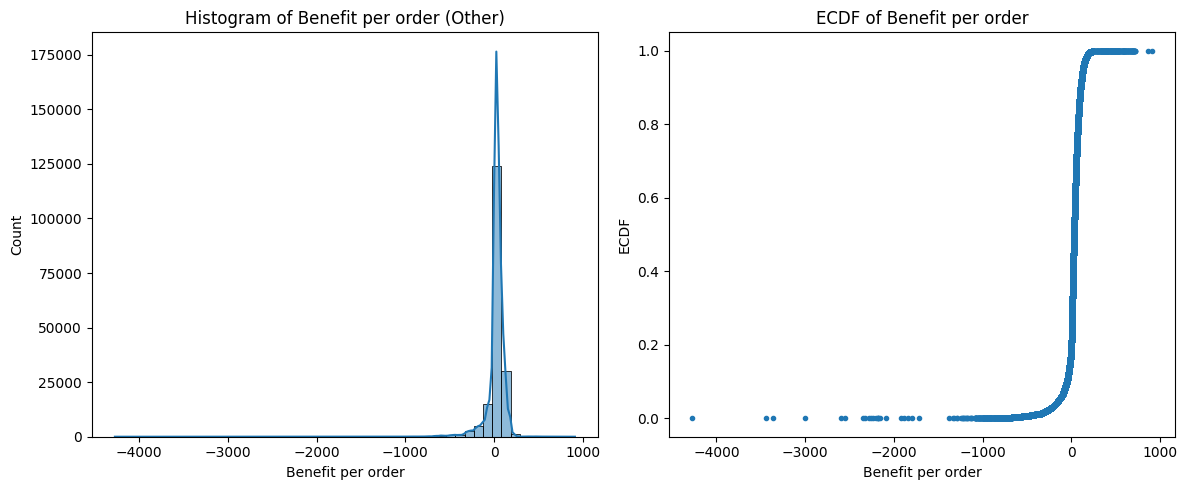


=== Sales per customer (Cost) ===
count    180519.000000
mean        183.107609
std         120.043670
min           7.490000
25%         104.379997
50%         163.990005
75%         247.399994
max        1939.989990
Name: Sales per customer, dtype: float64


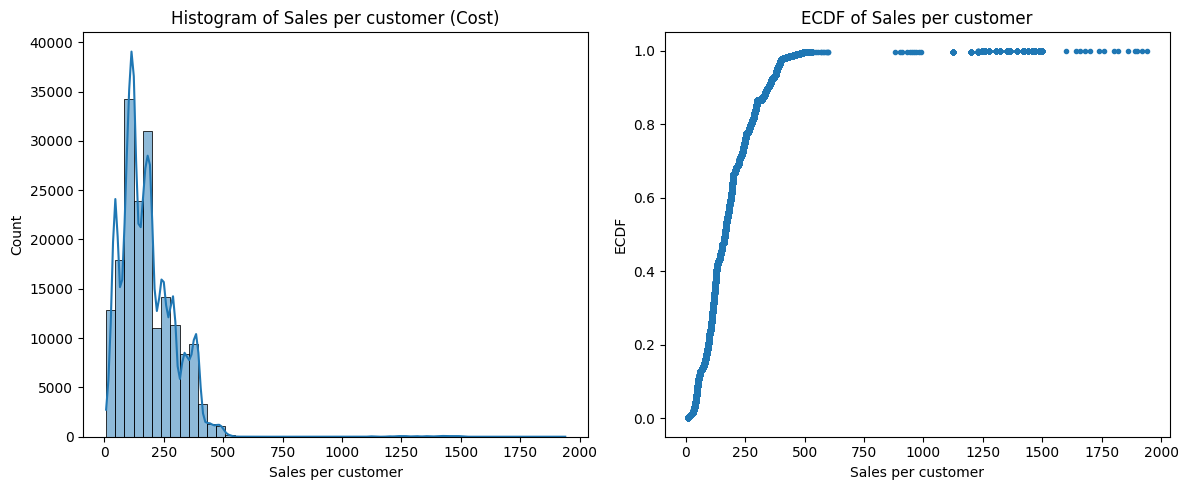


=== Late_delivery_risk (Other) ===
count    180519.000000
mean          0.548291
std           0.497664
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Late_delivery_risk, dtype: float64


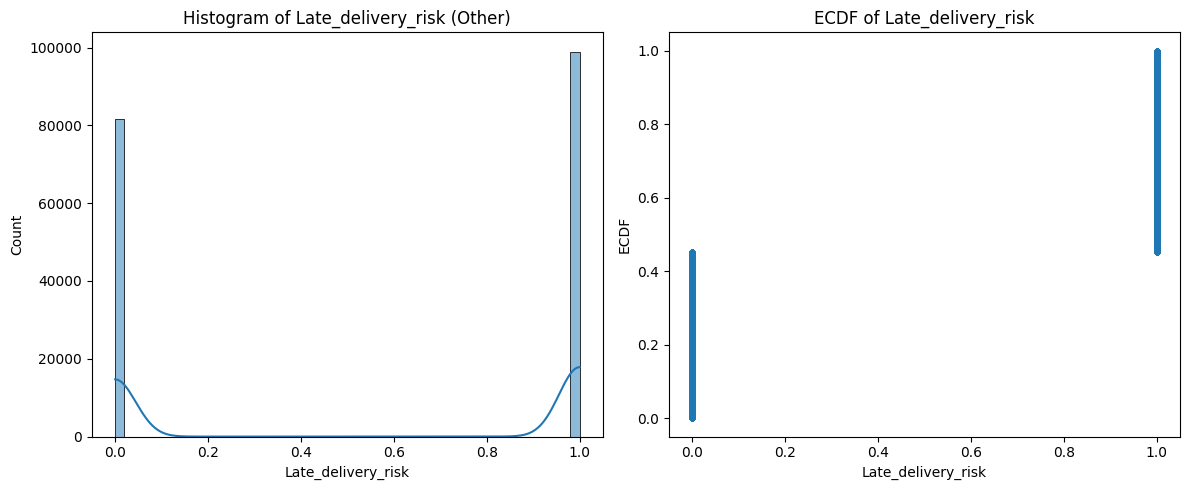


=== Category Id (Frequency) ===
count    180519.000000
mean         31.851451
std          15.640064
min           2.000000
25%          18.000000
50%          29.000000
75%          45.000000
max          76.000000
Name: Category Id, dtype: float64


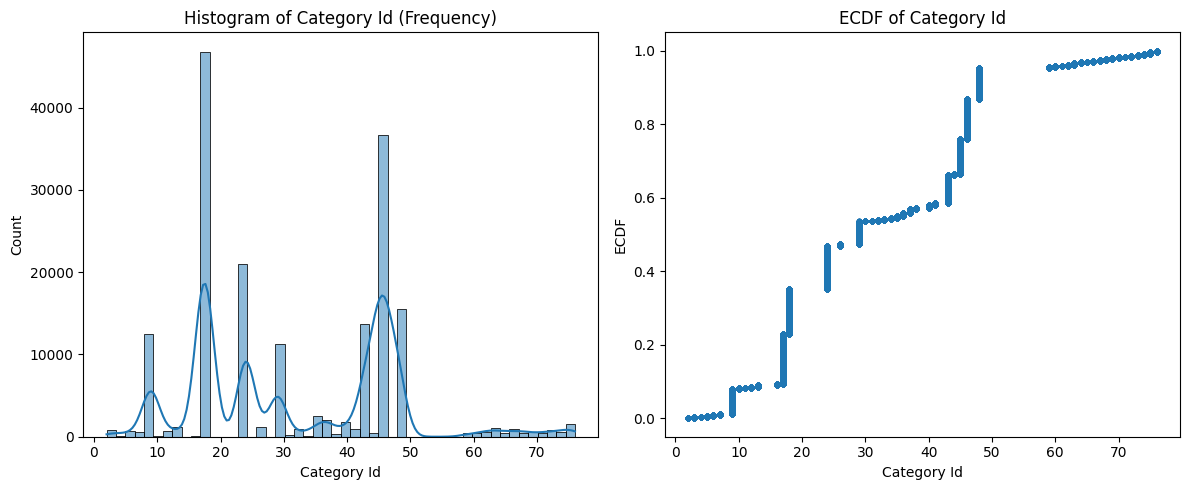


=== Customer Id (Identification/Reference) ===
count    180519.000000
mean       6691.379495
std        4162.918106
min           1.000000
25%        3258.500000
50%        6457.000000
75%        9779.000000
max       20757.000000
Name: Customer Id, dtype: float64


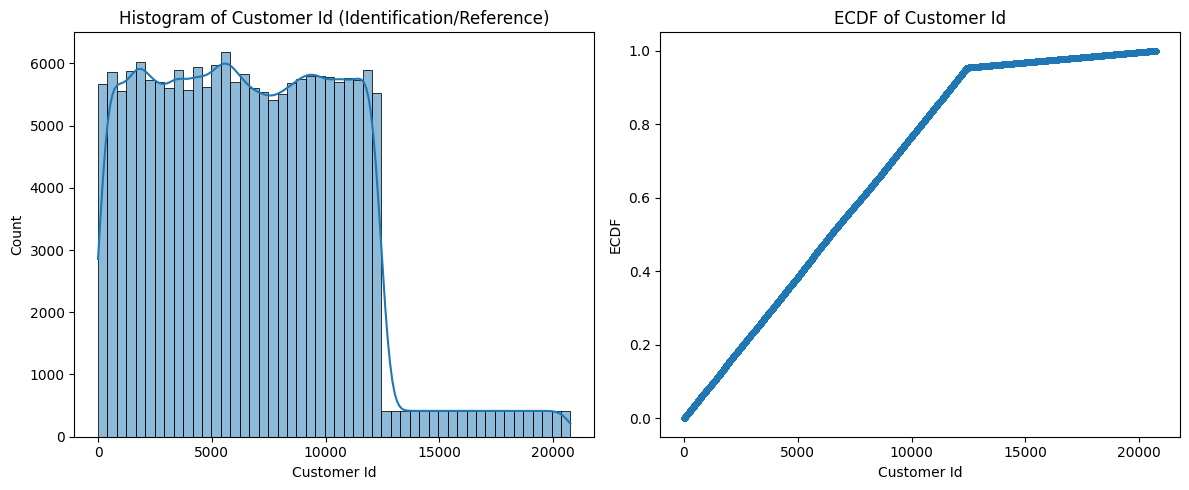


=== Customer Zipcode (Identification/Reference) ===
count    180516.000000
mean      35921.126914
std       37542.461122
min         603.000000
25%         725.000000
50%       19380.000000
75%       78207.000000
max       99205.000000
Name: Customer Zipcode, dtype: float64


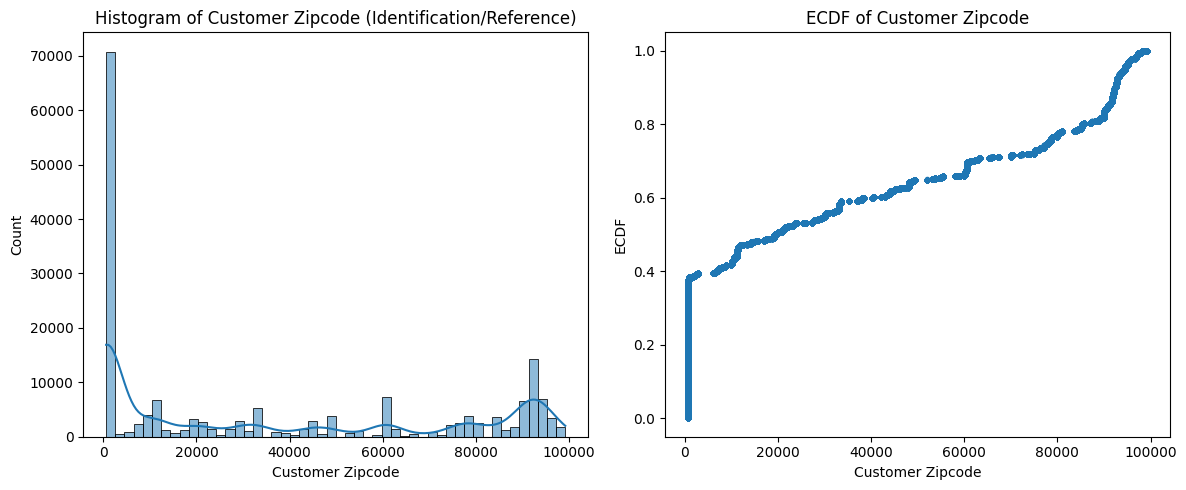


=== Department Id (Identification/Reference) ===
count    180519.000000
mean          5.443460
std           1.629246
min           2.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          12.000000
Name: Department Id, dtype: float64


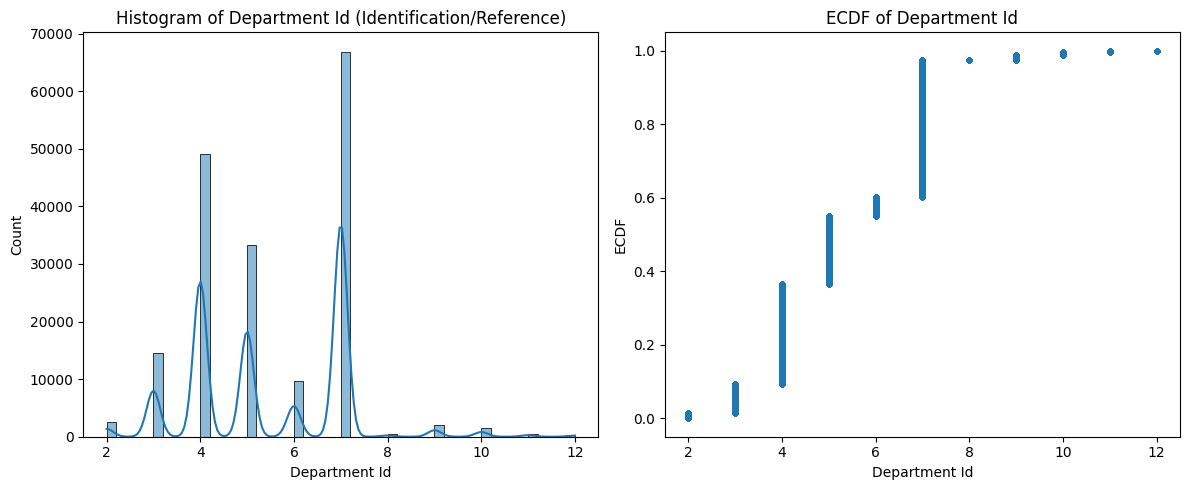


=== Latitude (Other) ===
count    180519.000000
mean         29.719955
std           9.813646
min         -33.937553
25%          18.265432
50%          33.144863
75%          39.279617
max          48.781933
Name: Latitude, dtype: float64


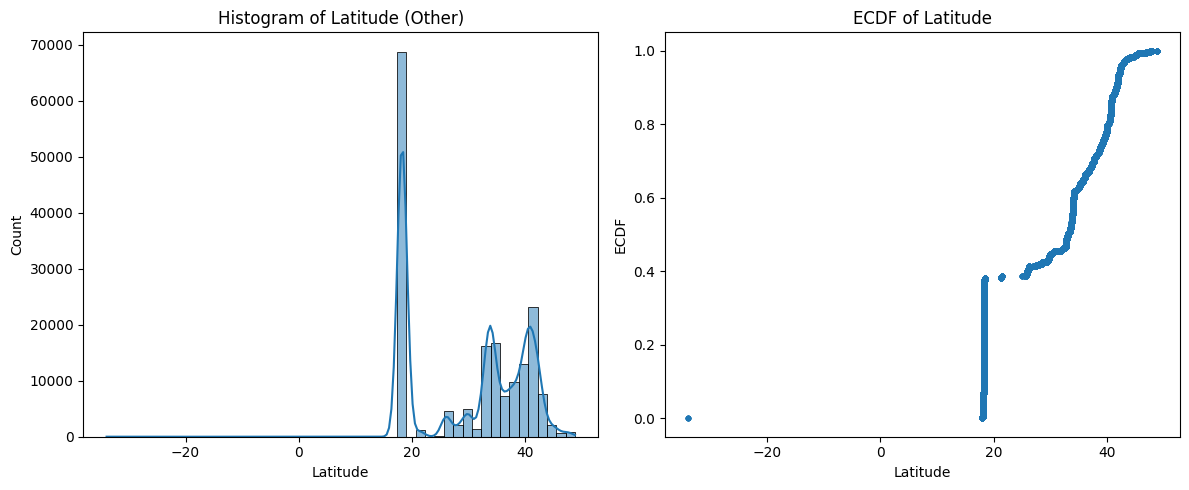


=== Longitude (Other) ===
count    180519.000000
mean        -84.915675
std          21.433241
min        -158.025986
25%         -98.446312
50%         -76.847908
75%         -66.370583
max         115.263077
Name: Longitude, dtype: float64


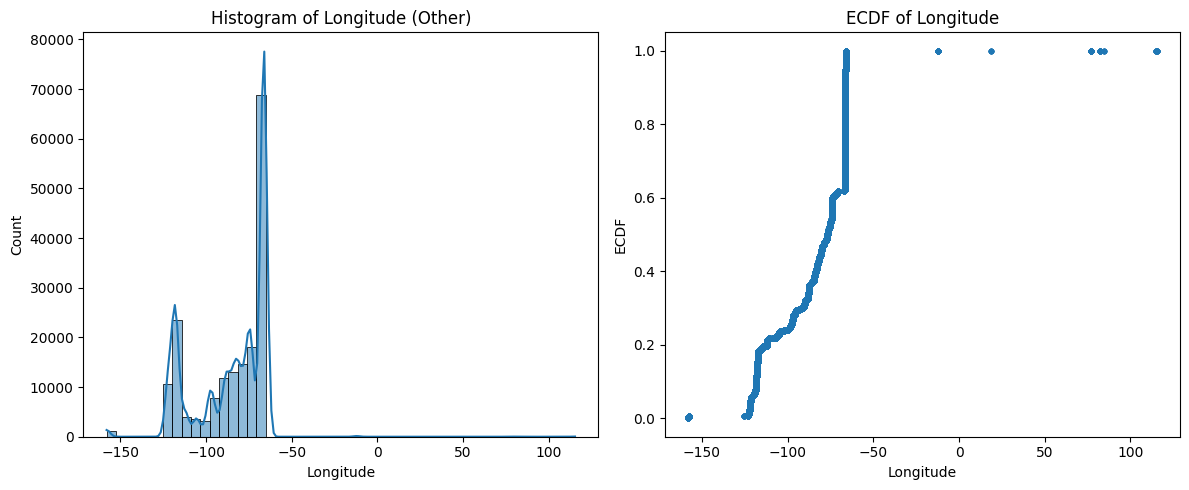


=== Order Customer Id (Identification/Reference) ===
count    180519.000000
mean       6691.379495
std        4162.918106
min           1.000000
25%        3258.500000
50%        6457.000000
75%        9779.000000
max       20757.000000
Name: Order Customer Id, dtype: float64


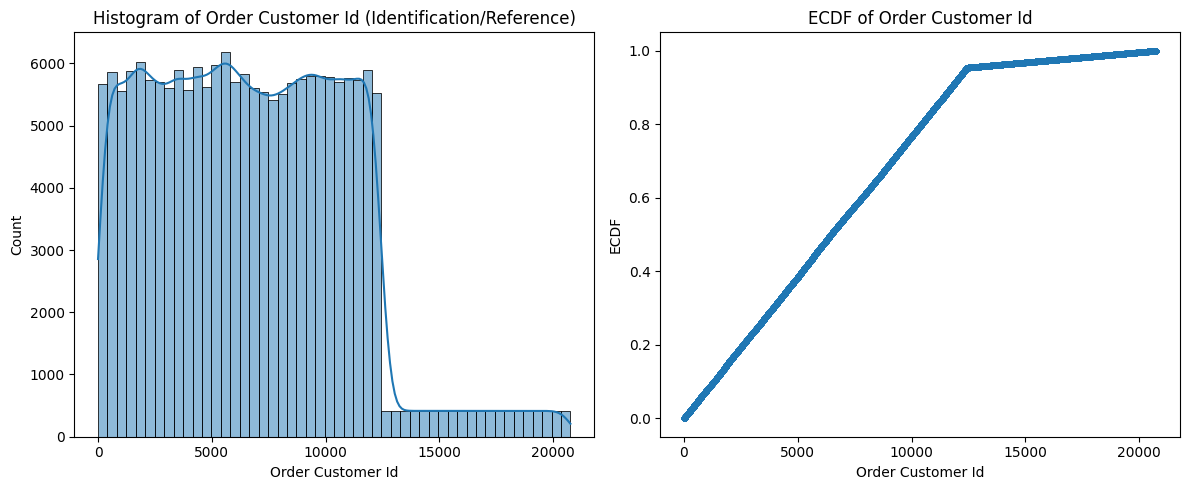


=== Order Id (Identification/Reference) ===
count    180519.000000
mean      36221.894903
std       21045.379569
min           1.000000
25%       18057.000000
50%       36140.000000
75%       54144.000000
max       77204.000000
Name: Order Id, dtype: float64


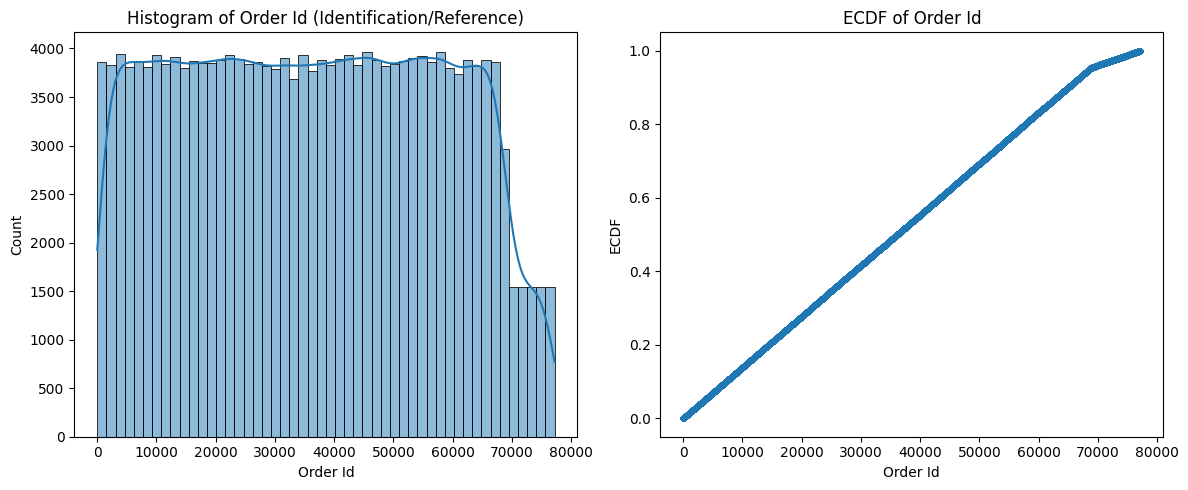


=== Order Item Cardprod Id (Identification/Reference) ===
count    180519.000000
mean        692.509764
std         336.446807
min          19.000000
25%         403.000000
50%         627.000000
75%        1004.000000
max        1363.000000
Name: Order Item Cardprod Id, dtype: float64


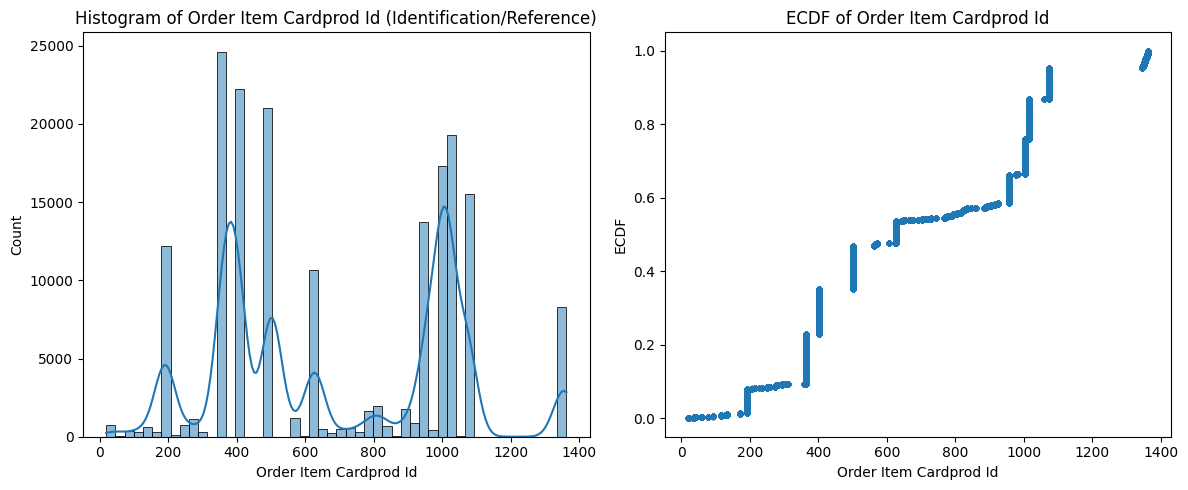


=== Order Item Discount (Cost) ===
count    180519.000000
mean         20.664741
std          21.800901
min           0.000000
25%           5.400000
50%          14.000000
75%          29.990000
max         500.000000
Name: Order Item Discount, dtype: float64


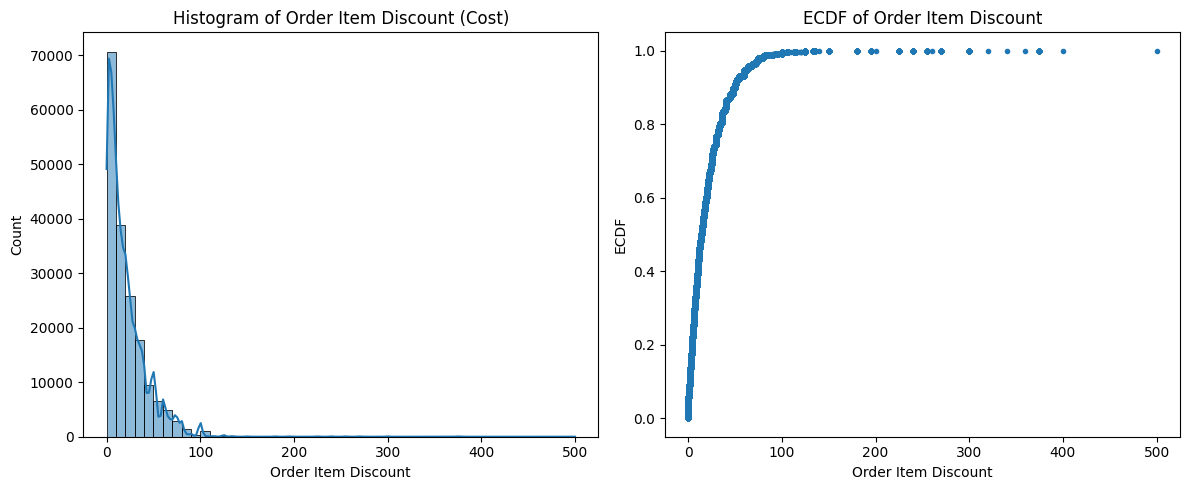


=== Order Item Discount Rate (Cost) ===
count    180519.000000
mean          0.101668
std           0.070415
min           0.000000
25%           0.040000
50%           0.100000
75%           0.160000
max           0.250000
Name: Order Item Discount Rate, dtype: float64


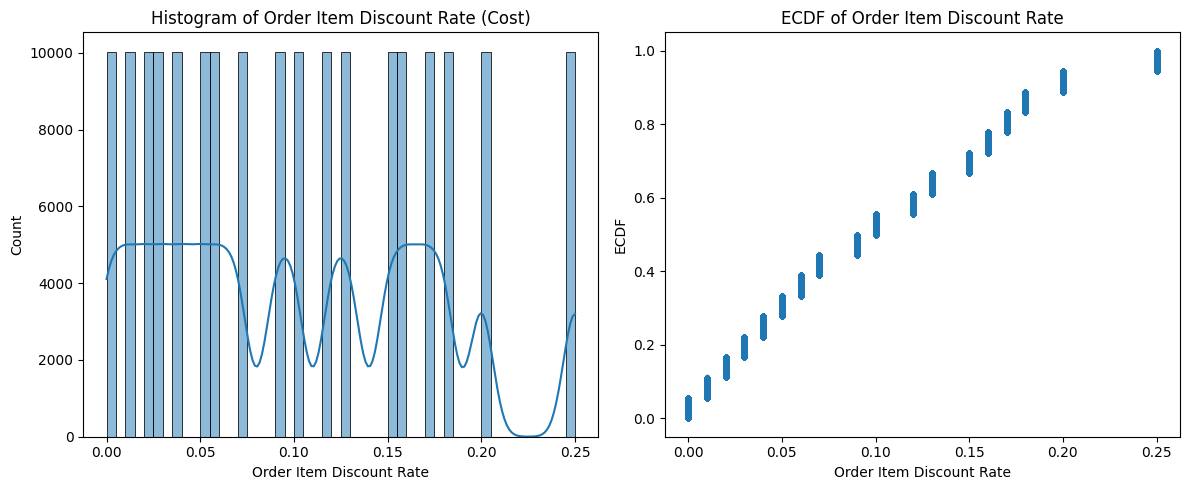


=== Order Item Id (Identification/Reference) ===
count    180519.000000
mean      90260.000000
std       52111.490959
min           1.000000
25%       45130.500000
50%       90260.000000
75%      135389.500000
max      180519.000000
Name: Order Item Id, dtype: float64


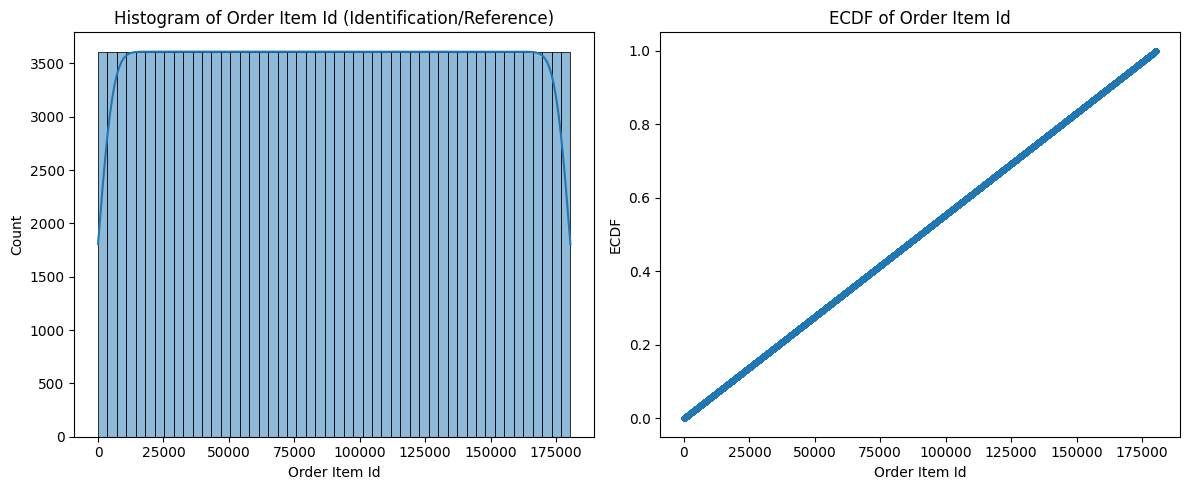


=== Order Item Product Price (Cost) ===
count    180519.000000
mean        141.232550
std         139.732492
min           9.990000
25%          50.000000
50%          59.990002
75%         199.990005
max        1999.989990
Name: Order Item Product Price, dtype: float64


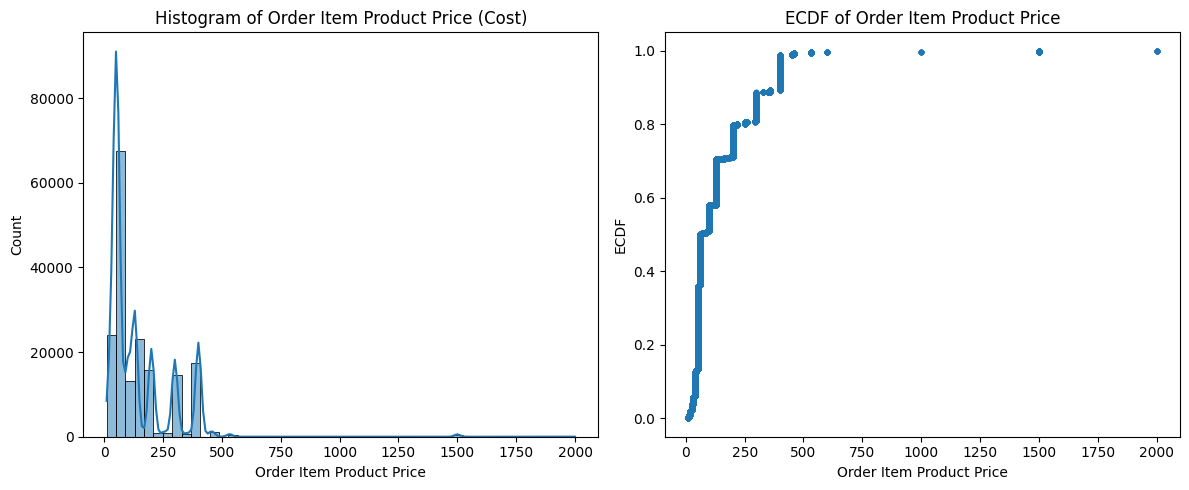


=== Order Item Profit Ratio (Cost) ===
count    180519.000000
mean          0.120647
std           0.466796
min          -2.750000
25%           0.080000
50%           0.270000
75%           0.360000
max           0.500000
Name: Order Item Profit Ratio, dtype: float64


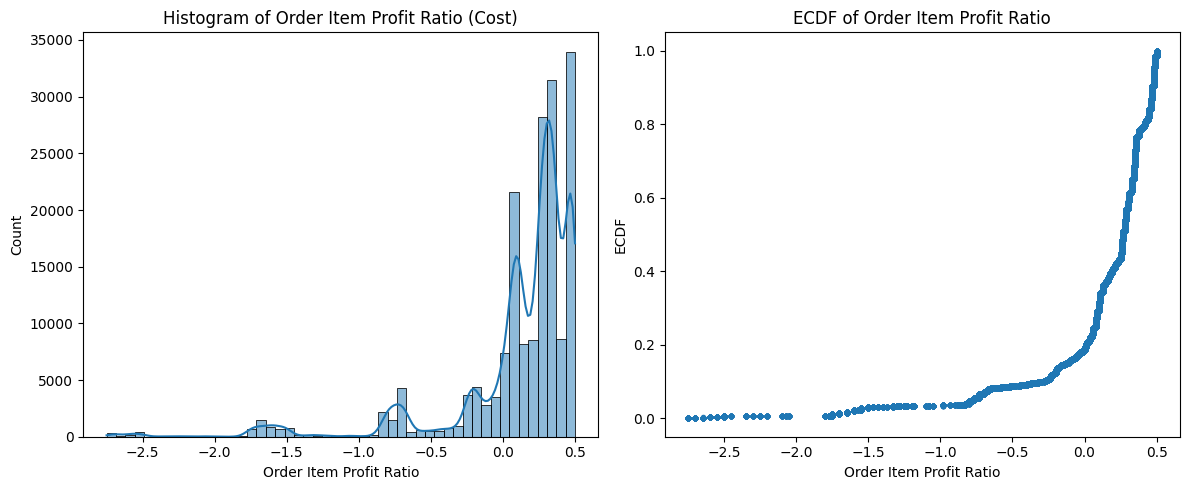


=== Order Item Quantity (Cost) ===
count    180519.000000
mean          2.127638
std           1.453451
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           5.000000
Name: Order Item Quantity, dtype: float64


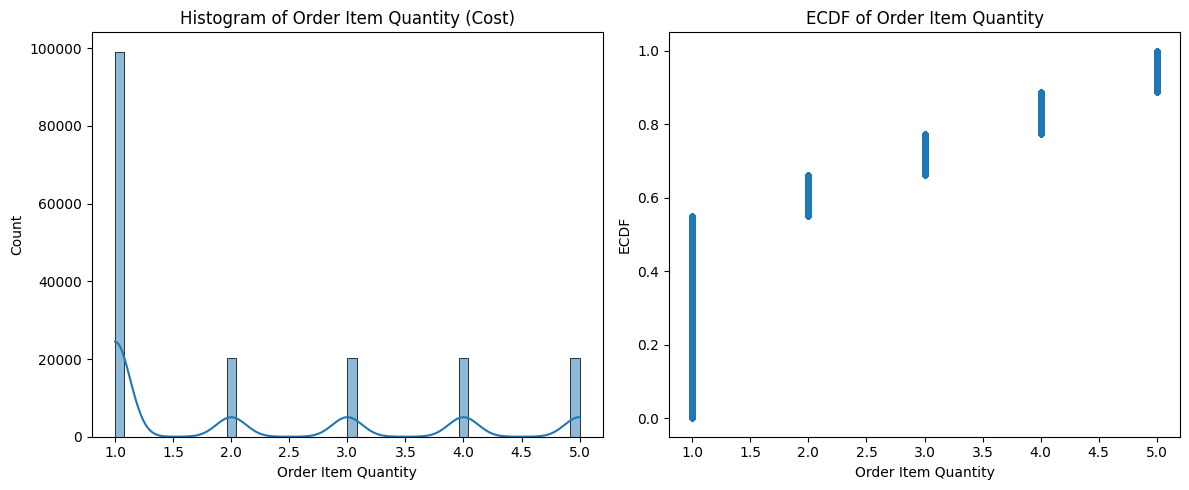


=== Sales (Cost) ===
count    180519.000000
mean        203.772096
std         132.273077
min           9.990000
25%         119.980003
50%         199.919998
75%         299.950012
max        1999.989990
Name: Sales, dtype: float64


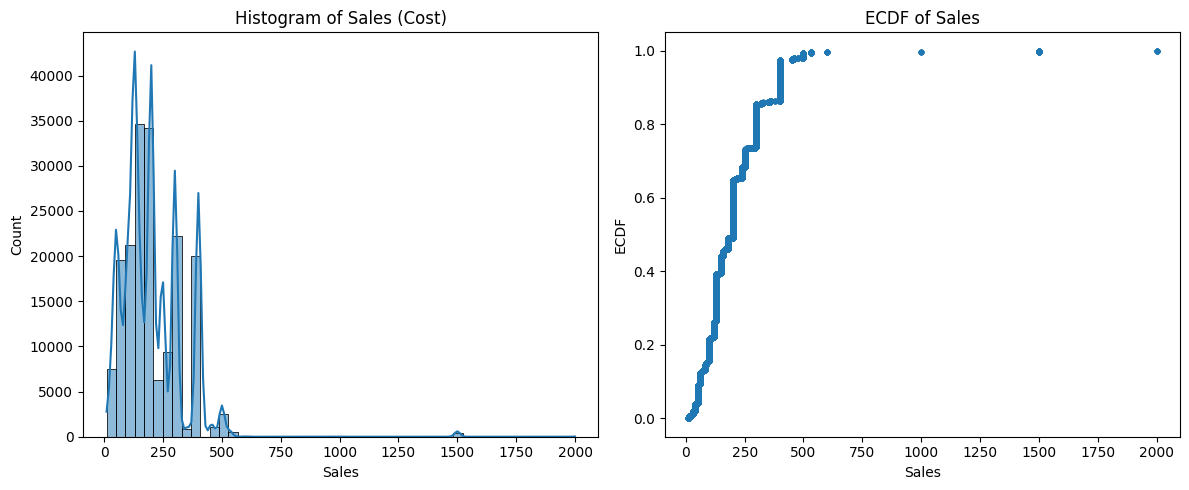


=== Order Item Total (Cost) ===
count    180519.000000
mean        183.107609
std         120.043670
min           7.490000
25%         104.379997
50%         163.990005
75%         247.399994
max        1939.989990
Name: Order Item Total, dtype: float64


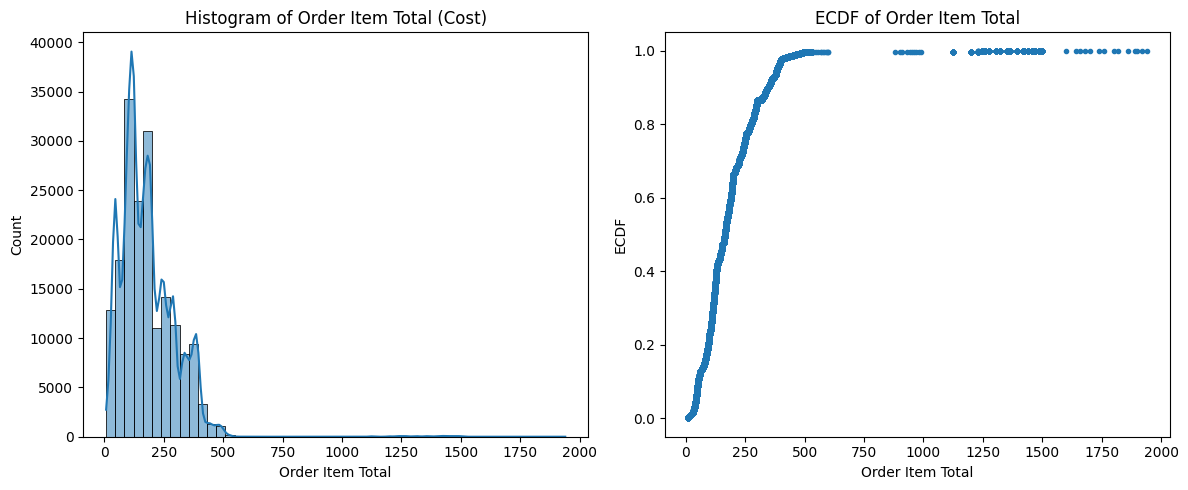


=== Order Profit Per Order (Cost) ===
count    180519.000000
mean         21.974989
std         104.433526
min       -4274.979980
25%           7.000000
50%          31.520000
75%          64.800003
max         911.799988
Name: Order Profit Per Order, dtype: float64


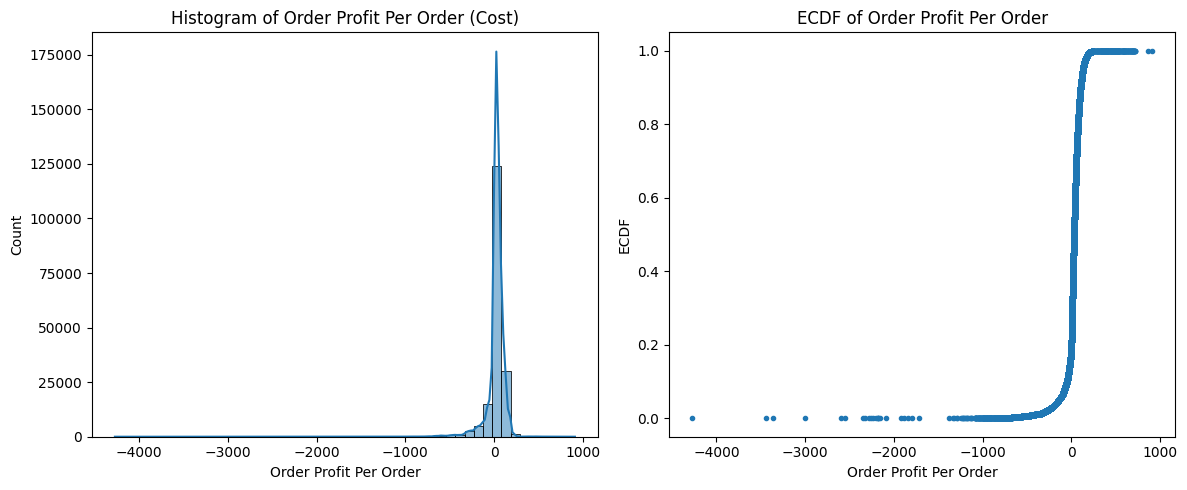


=== Order Zipcode (Identification/Reference) ===
count    24840.000000
mean     55426.132327
std      31919.279101
min       1040.000000
25%      23464.000000
50%      59405.000000
75%      90008.000000
max      99301.000000
Name: Order Zipcode, dtype: float64


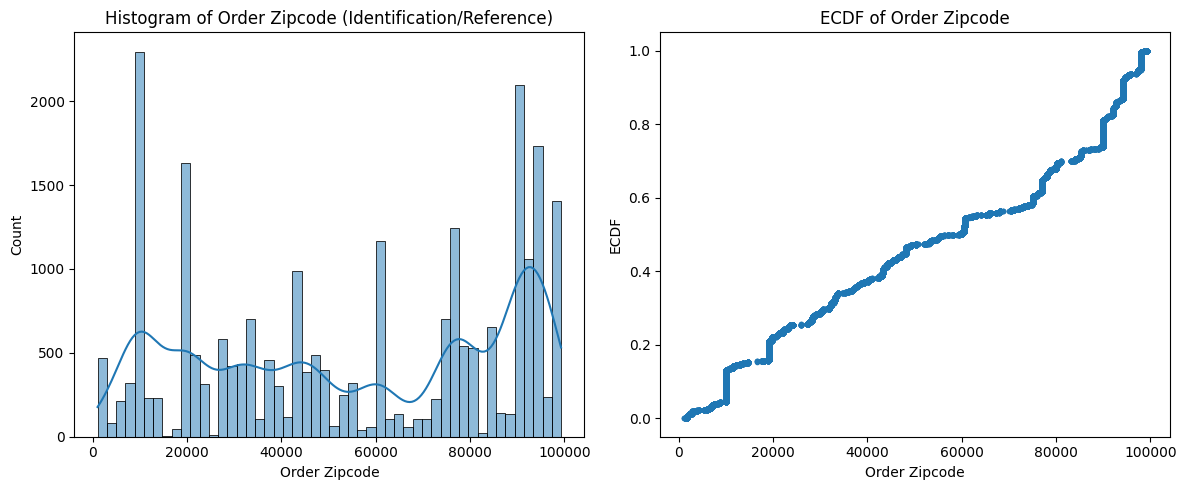


=== Product Card Id (Identification/Reference) ===
count    180519.000000
mean        692.509764
std         336.446807
min          19.000000
25%         403.000000
50%         627.000000
75%        1004.000000
max        1363.000000
Name: Product Card Id, dtype: float64


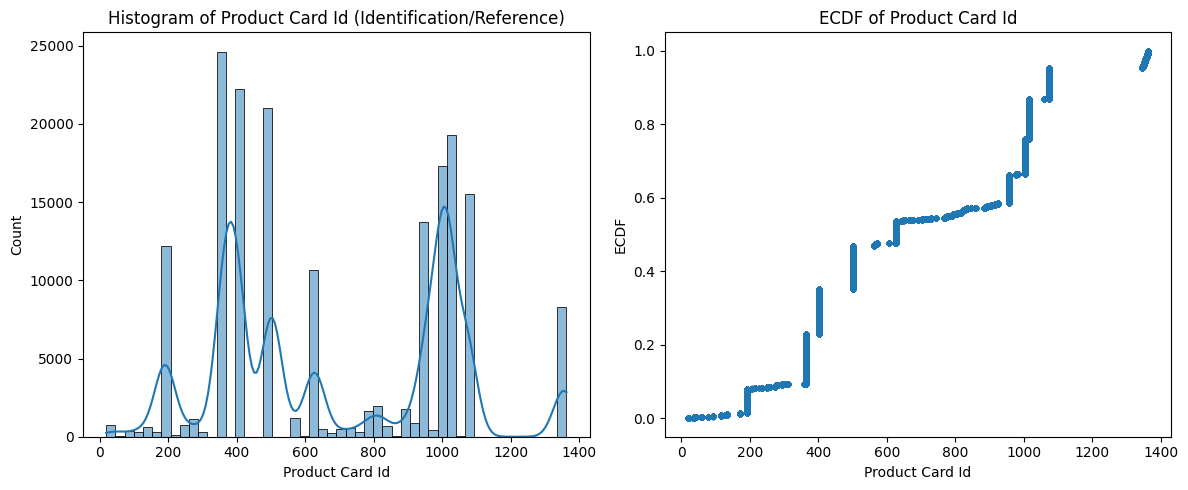


=== Product Category Id (Frequency) ===
count    180519.000000
mean         31.851451
std          15.640064
min           2.000000
25%          18.000000
50%          29.000000
75%          45.000000
max          76.000000
Name: Product Category Id, dtype: float64


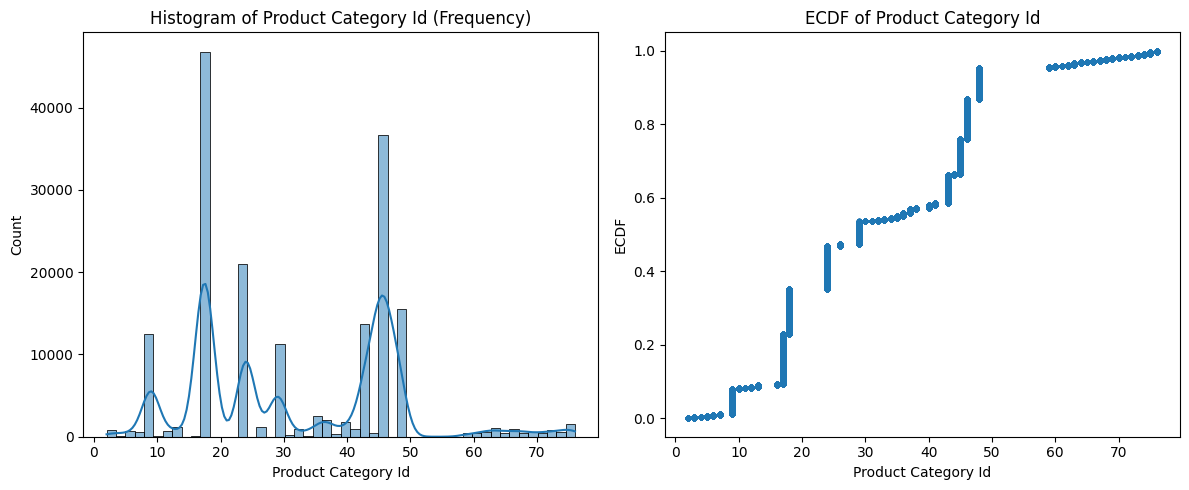


=== Product Description (Other) ===
Skipping: No valid data points.

=== Product Price (Cost) ===
count    180519.000000
mean        141.232550
std         139.732492
min           9.990000
25%          50.000000
50%          59.990002
75%         199.990005
max        1999.989990
Name: Product Price, dtype: float64


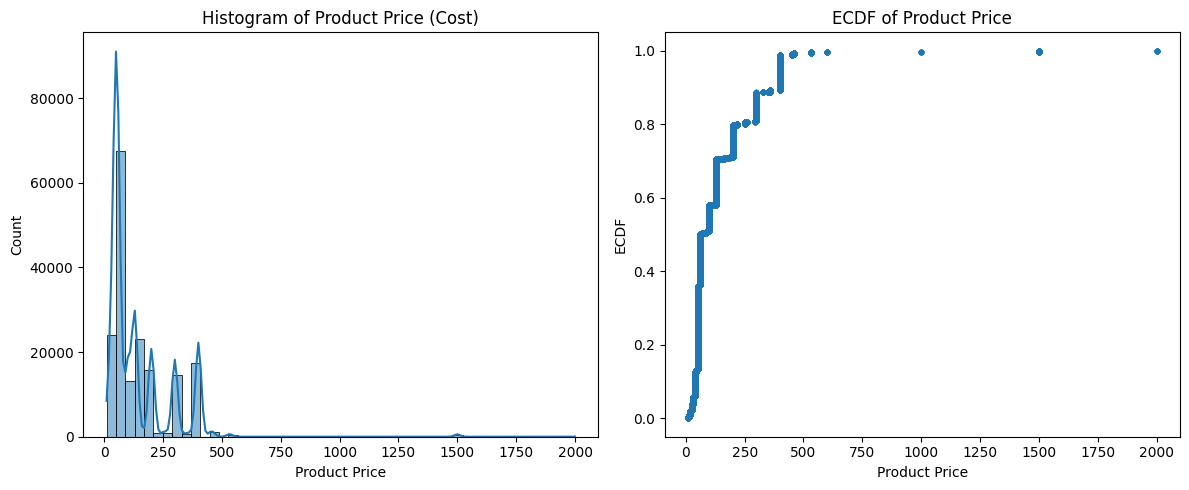


=== Product Status (Severity) ===
Skipping: Only one unique value (0). Not enough variation.


In [15]:
for _, row in mapped_numeric.iterrows():
    col = row['Field']
    risk_type = row['Risk Variable Type']
    
    # Drop NA and check if data is valid
    data = main_df[col].dropna()
    unique_vals = data.nunique()
    
    print(f"\n=== {col} ({risk_type}) ===")
    
    # Skip if no data
    if data.empty:
        print("Skipping: No valid data points.")
        continue

    # Skip if all values are the same
    if unique_vals == 1:
        print(f"Skipping: Only one unique value ({data.iloc[0]}). Not enough variation.")
        continue

    # Show summary statistics
    print(data.describe())
    
    # Plot safely
    try:
        plt.figure(figsize=(12, 5))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data, kde=True, bins=50)
        plt.title(f"Histogram of {col} ({risk_type})")

        # ECDF
        plt.subplot(1, 2, 2)
        ecdf = ECDF(data)
        plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='none')
        plt.title(f"ECDF of {col}")
        plt.xlabel(col)
        plt.ylabel('ECDF')

        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Plotting failed for {col}: {e}")